# Market Basket Analysis 

In [107]:
# import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from mlxtend.frequent_patterns import apriori, association_rules
import warnings  
warnings.filterwarnings('ignore')

In [61]:
#load the dataset
data = pd.read_csv(r'C:\Users\Rebecca\Desktop\market basket analysis project\Retail_Transactions_Dataset.csv')

In [62]:
#first 5 rows of the dataset
data.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


# Data Preparation

In [63]:
#check the shape of the dataset
data.shape

(1000000, 13)

In [64]:
#info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 92.5+ MB


In [65]:
#check sumary statistics of the dataset
data.describe()

,Transaction_ID,Total_Items,Total_Cost
count,1.000000e+06,1000000.000000,1000000.000000
mean,1.000500e+09,5.495941,52.455220
std,2.886753e+05,2.871654,27.416989
min,1.000000e+09,1.000000,5.000000
25%,1.000250e+09,3.000000,28.710000
50%,1.000500e+09,5.000000,52.420000
75%,1.000750e+09,8.000000,76.190000
max,1.001000e+09,10.000000,100.000000


In [66]:
#check for null values in the dataset
data.isnull().sum()

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

In [67]:
#remove the column with missing values
data = data.dropna(axis=1)

In [68]:
data.isnull().sum()

Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
dtype: int64

In [69]:
#check for duplicated values in the dataset
data.duplicated().sum()

0

In [70]:
#remove duplicated values
data = data.drop_duplicates()

In [110]:
# Convert the 'Product' column from string representation of list to actual list if needed
import ast
if isinstance(data['Product'].iloc[0], str):
    data['Product'] = data['Product'].apply(ast.literal_eval)

# Explode the 'Product' column so each row has a single product
data_exploded = data.explode('Product')

# Convert transactional data to basket data
basket_data = (
    data_exploded
    .groupby(['Transaction_ID', 'Product'])['Total_Items']
    .sum().unstack().reset_index().fillna(0)
    .set_index('Transaction_ID')
)

# Convert the values to 1 and 0
basket = basket_data.applymap(lambda x: 1 if x > 0 else 0)

In [72]:
#save cleaned data to a new CSV file
basket.to_csv(r'C:\Users\Rebecca\Desktop\market basket analysis project\cleaned_basket_data.csv')

# Exploritory Data Analysis

In [73]:
#Top selling products
top_selling_products = basket.sum().sort_values(ascending=False).head(10)
print("Top Selling Products:")
print(top_selling_products)


Top Selling Products:
Product
Toothpaste       70949
Ice Cream        36485
Soap             36438
Orange           36342
Jam              36336
Soda             36324
Cleaning Rags    36279
Deodorant        36278
Air Freshener    36266
Banana           36224
dtype: int64


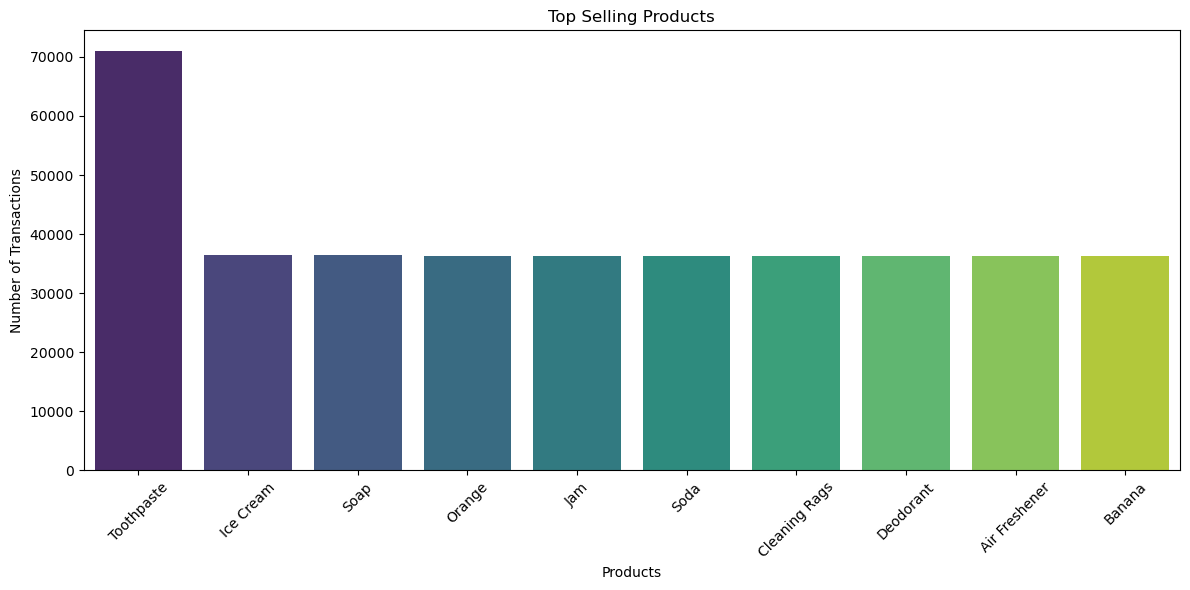

In [111]:
# visualize the top selling products using 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_products.index, y=top_selling_products.values, palette='viridis', legend=False)
plt.title('Top Selling Products')
plt.xlabel('Products')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

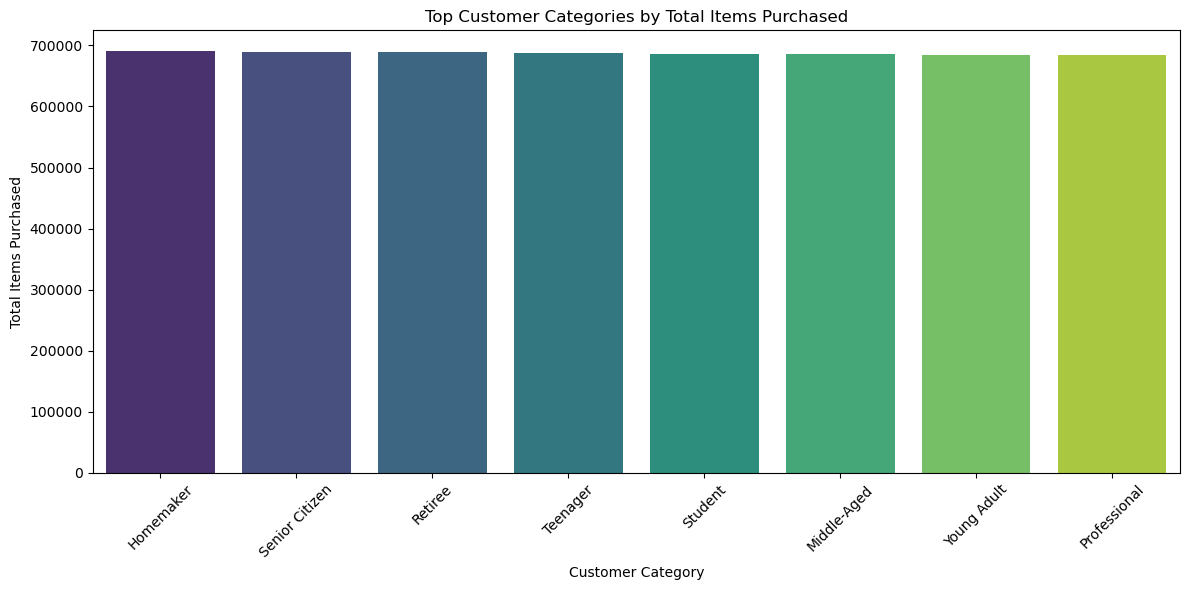

In [112]:
# Season vs. Customer Category & Total Items (Grouped Bar Chart) with vidris color palette
top_customer_category = data.groupby('Customer_Category')['Total_Items'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customer_category.index, y=top_customer_category.values, palette='viridis', legend=False)
plt.title('Top Customer Categories by Total Items Purchased')
plt.xlabel('Customer Category')
plt.ylabel('Total Items Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [76]:
# Top Customer Category by Total Items Purchased
top_customer_category = data.groupby('Customer_Category')['Total_Items'].sum().sort_values(ascending=False).head(10)
print("Top Customer Categories by Total Items Purchased:")
print(top_customer_category)

Top Customer Categories by Total Items Purchased:
Customer_Category
Homemaker         690108
Senior Citizen    689355
Retiree           688579
Teenager          687960
Student           686230
Middle-Aged       685671
Young Adult       684619
Professional      683419
Name: Total_Items, dtype: int64


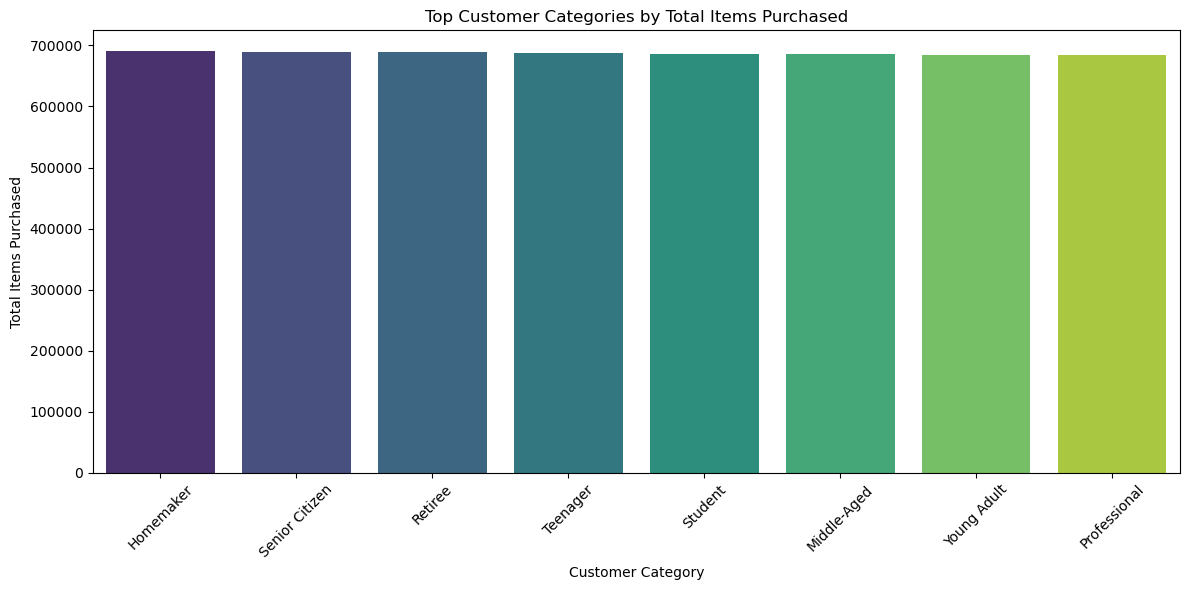

In [113]:
#visualize the top customer categories in ascending order
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customer_category.index, y=top_customer_category.values, palette='viridis', legend=False)
plt.title('Top Customer Categories by Total Items Purchased')
plt.xlabel('Customer Category')
plt.ylabel('Total Items Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

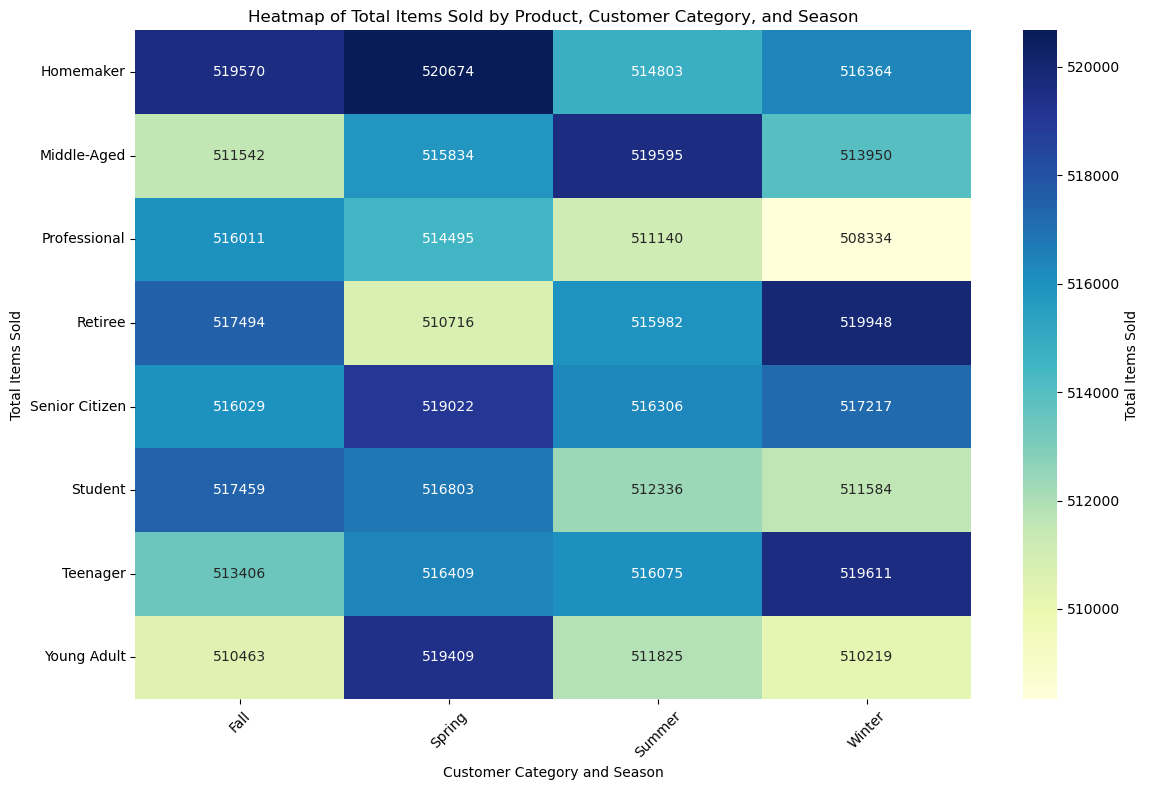

In [78]:
# heatmap for revenue By Product and Customer Category and Season
heatmap_data = data_exploded.groupby(['Customer_Category', 'Season'])['Total_Items'].sum().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Total Items Sold'})
plt.title('Heatmap of Total Items Sold by Product, Customer Category, and Season')
plt.xlabel('Customer Category and Season')
plt.ylabel('Total Items Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Transformation

In [79]:
from mlxtend.preprocessing import TransactionEncoder
import ast

#transaction list from products column
transactions = data['Product'].tolist()

# convert string into list
transactions = [ast.literal_eval(t) if isinstance(t, str) else t for t in transactions]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)


In [80]:
# Fit and transform the data
te_ary = te.fit(data['Product']).transform(data['Product'])

In [81]:
# transform the data into a DataFrame
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

In [82]:
# Convert basket_data to one-hot encoded 
basket_onehot = basket_data.map(lambda x: 1 if x > 0 else 0)

In [83]:
#new column for Transactuon_ID and Product
basket_onehot['Transaction_ID'] = data_exploded['Transaction_ID'].unique()

In [84]:
print("One-hot encoded basket data:")
basket_onehot.head()

One-hot encoded basket data:


Product,Air Freshener,Apple,BBQ Sauce,Baby Wipes,Banana,Bath Towels,Beef,Bread,Broom,Butter,...,Toothbrush,Toothpaste,Trash Bags,Trash Cans,Tuna,Vacuum Cleaner,Vinegar,Water,Yogurt,Transaction_ID
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1000000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000000000
1000000001,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1000000001
1000000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000000002
1000000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000000003
1000000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000000004


In [85]:
# Drop the 'Transaction_ID' column from basket_onehot if it exists
if 'Transaction_ID' in basket_onehot.columns:
    basket_onehot = basket_onehot.drop(columns=['Transaction_ID'])

In [86]:
#correlation matrix for basket_onehot
basket_onehot.corr()

Product,Air Freshener,Apple,BBQ Sauce,Baby Wipes,Banana,Bath Towels,Beef,Bread,Broom,Butter,...,Tomatoes,Toothbrush,Toothpaste,Trash Bags,Trash Cans,Tuna,Vacuum Cleaner,Vinegar,Water,Yogurt
Product,,,,,,,,,,,,,,,,,,,,,
Air Freshener,1.000000,-0.002951,-0.003479,-0.003055,-0.003684,-0.003931,-0.004347,-0.003970,-0.003240,-0.004511,...,-0.004575,-0.004413,-0.004376,-0.003691,-0.003589,-0.004418,-0.005302,-0.004661,-0.002637,-0.005364
Apple,-0.002951,1.000000,-0.003051,-0.003516,-0.004034,-0.003909,-0.004357,-0.004417,-0.004146,-0.002904,...,-0.003749,-0.002342,-0.003530,-0.004460,-0.002988,-0.004199,-0.002949,-0.003576,-0.002932,-0.003764
BBQ Sauce,-0.003479,-0.003051,1.000000,-0.004071,-0.003725,-0.002392,-0.003959,-0.004447,-0.002964,-0.004412,...,-0.003583,-0.003362,-0.006821,-0.003996,-0.006047,-0.003483,-0.004427,-0.004996,-0.003922,-0.001042
Baby Wipes,-0.003055,-0.003516,-0.004071,1.000000,-0.002813,-0.001711,-0.003447,-0.004305,-0.003516,-0.001649,...,-0.003099,-0.003597,-0.003588,-0.003825,-0.005070,-0.002710,-0.003222,-0.005314,-0.003231,-0.005382
Banana,-0.003684,-0.004034,-0.003725,-0.002813,1.000000,-0.002771,-0.005711,-0.005110,-0.004552,-0.000094,...,-0.005453,-0.003740,-0.005359,-0.005152,-0.003949,-0.003888,-0.004026,-0.002662,-0.004962,-0.004119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuna,-0.004418,-0.004199,-0.003483,-0.002710,-0.003888,-0.004454,-0.004785,-0.004961,-0.004488,-0.004694,...,-0.003747,-0.003556,-0.005181,-0.002946,-0.005264,1.000000,-0.003555,-0.003255,-0.006782,-0.003274
Vacuum Cleaner,-0.005302,-0.002949,-0.004427,-0.003222,-0.004026,-0.004707,-0.003197,-0.002352,-0.003383,-0.004254,...,-0.004433,-0.002309,-0.006803,-0.002592,-0.003961,-0.003555,1.000000,-0.005012,-0.004458,-0.004131
Vinegar,-0.004661,-0.003576,-0.004996,-0.005314,-0.002662,-0.004612,-0.005549,-0.005006,-0.003170,-0.003146,...,-0.004453,-0.004176,-0.006040,-0.003452,-0.003778,-0.003255,-0.005012,1.000000,-0.005844,-0.003545


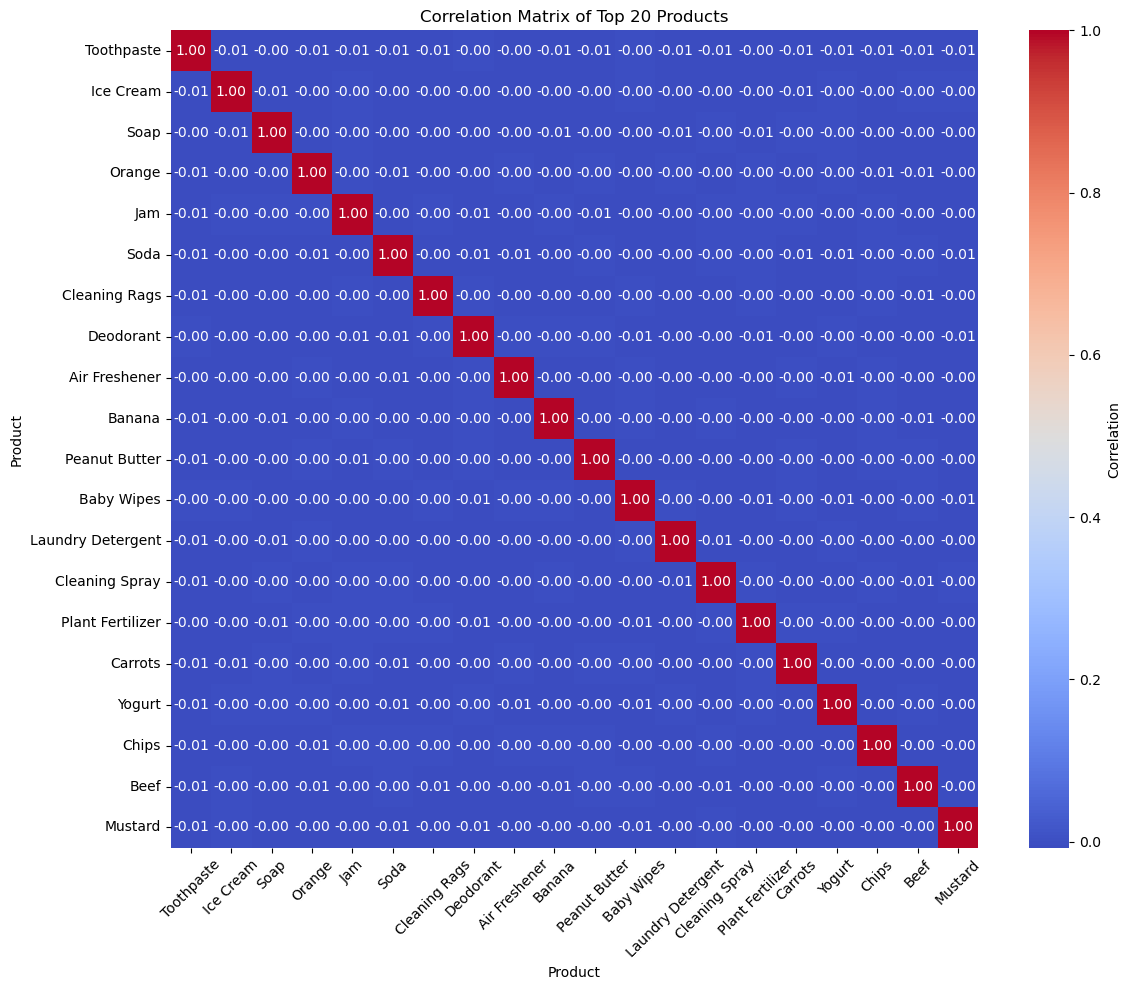

In [87]:
#visualize the basket_onehot correlation
# To avoid MemoryError, select only the top N most frequent products for the correlation plot
N = 20  # You can adjust this number based on your memory capacity
top_products = basket_onehot.sum().sort_values(ascending=False).head(N).index

# Compute the correlation matrix for the top N products
corr_matrix = basket_onehot[top_products].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title(f'Correlation Matrix of Top {N} Products')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [88]:
# new Transaction_ID column in basket_onehot
basket_onehot['Transaction_ID'] = basket_onehot.index.astype(str).str[-1].astype(int)


In [89]:
basket_onehot = basket_onehot.astype(bool).astype(int)

In [90]:
basket_onehot.head()

Product,Air Freshener,Apple,BBQ Sauce,Baby Wipes,Banana,Bath Towels,Beef,Bread,Broom,Butter,...,Toothbrush,Toothpaste,Trash Bags,Trash Cans,Tuna,Vacuum Cleaner,Vinegar,Water,Yogurt,Transaction_ID
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1000000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000001,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1000000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
#save the data transformation to a new CSV file
basket_onehot.to_csv(r'C:\Users\Rebecca\Desktop\market basket analysis project\basket_onehot.csv', index=False)

# Apriori Model

*  Apriori algorithm finds frequent product combinations; association rules help identify strong product affinities for bundling or promotions

In [92]:
#import apriori model
from mlxtend.frequent_patterns import apriori, association_rules

In [114]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(basket_onehot, min_support=0.5, use_colnames=True)
basket_onehot = basket_onehot.astype(bool)


In [115]:
from sklearn.decomposition import PCA

# frequency of items
item_counts = basket.sum(axis=0)
# 10 transactions
frequent_items = item_counts[item_counts >= 10].index
basket_reduced = basket[frequent_items]

# using 10 % of data for memory efficiency
basket_sample = basket_reduced.sample(frac=0.1, random_state=42)

# min_support to find frequent itemsets
# Reduce dimensions to 10 principal components for efficiency
pca = PCA(n_components=10, random_state=42)
basket_sample_pca = pca.fit_transform(basket_sample)

# Convert back to DataFrame for apriori (round to 0/1 for binary encoding)
basket_sample_pca_df = pd.DataFrame((basket_sample_pca > 0).astype(int), index=basket_sample.index)
basket_onehot = basket_onehot.astype(bool)

# Run apriori on PCA-reduced data
frequent_itemsets = apriori(basket_sample_pca_df, min_support=0.01, use_colnames=True)

if not frequent_itemsets.empty:
	rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
	print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
	if frequent_itemsets.empty:
		# Sort items by frequency and keep only the top 20 most frequent items
		top_items = item_counts.sort_values(ascending=False).head(20).index
		basket_sample_top = basket_sample[top_items]
		frequent_itemsets = apriori(basket_sample_top, min_support=0.01, use_colnames=True)
		if not frequent_itemsets.empty:
			rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
			print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
		else:
			print("No frequent itemsets found even after reducing to top 20 items. Try lowering min_support further or reducing items more.")


            antecedents consequents  support  confidence      lift
0                (3, 4)         (1)  0.14581    0.600263  1.182902
1             (0, 3, 5)         (6)  0.01320    0.619718  1.239486
2             (0, 3, 6)         (5)  0.01320    0.615098  1.185891
3             (0, 5, 6)         (3)  0.01320    0.613383  1.249100
4             (0, 8, 3)         (5)  0.01272    0.638554  1.231114
..                  ...         ...      ...         ...       ...
159  (1, 2, 4, 7, 8, 9)         (3)  0.01030    0.682119  1.389075
160  (1, 3, 4, 7, 8, 9)         (2)  0.01030    0.692204  1.490824
161  (2, 3, 4, 7, 8, 9)         (1)  0.01030    0.759027  1.495768
162  (1, 2, 5, 6, 7, 8)         (9)  0.01001    0.717049  1.447063
163  (1, 2, 6, 7, 8, 9)         (5)  0.01001    0.655534  1.263850

[164 rows x 5 columns]


In [95]:
# Count item frequency
item_counts = basket_onehot.sum(axis=0)
# Keep items that appear in at least 5 transactions
frequent_items = item_counts[item_counts >= 5].index
basket_onehot_reduced = basket_onehot[frequent_items]
print("Reduced basket data shape:", basket_onehot_reduced.shape)


Reduced basket data shape: (1000000, 82)


In [96]:
# Use 10% of the data
basket_sample = basket_onehot_reduced.sample(frac=0.1, random_state=42)

In [117]:
from mlxtend.frequent_patterns import apriori

# Use the correct input DataFrame for apriori
frequent_itemsets = apriori(basket_onehot_reduced, min_support=0.6, use_colnames=True)
basket_onehot = basket_onehot.astype(bool)
print(frequent_itemsets)



   support          itemsets
0      0.9  (Transaction_ID)


In [98]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [118]:
# Use a reduced sample to avoid MemoryError
frequent_itemsets = apriori(basket_sample, min_support=0.01, use_colnames=True)
basket_onehot = basket_onehot.astype(bool)

In [100]:
basket_onehot.head()

Product,Air Freshener,Apple,BBQ Sauce,Baby Wipes,Banana,Bath Towels,Beef,Bread,Broom,Butter,...,Toothbrush,Toothpaste,Trash Bags,Trash Cans,Tuna,Vacuum Cleaner,Vinegar,Water,Yogurt,Transaction_ID
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1000000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000001,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1000000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [119]:
from mlxtend.frequent_patterns import apriori

apriori(basket_onehot, min_support=0.6)
basket_onehot = basket_onehot.astype(bool)

In [120]:
# Use a smaller sample to avoid MemoryError
sample_df = basket_sample.copy()

# Remove 'Transaction_ID' column if present
if 'Transaction_ID' in sample_df.columns:
    basket_for_apriori = sample_df.drop(columns=['Transaction_ID'])
else:
    basket_for_apriori = sample_df

# Run Apriori on the sample
frequent_itemsets = apriori(basket_for_apriori, min_support=0.01, use_colnames=True)
basket_onehot = basket_onehot.astype(bool)
print(frequent_itemsets)

    support          itemsets
0   0.03671   (Air Freshener)
1   0.03588           (Apple)
2   0.03667       (BBQ Sauce)
3   0.03603      (Baby Wipes)
4   0.03643          (Banana)
..      ...               ...
76  0.03450            (Tuna)
77  0.03527  (Vacuum Cleaner)
78  0.03605         (Vinegar)
79  0.03593           (Water)
80  0.03659          (Yogurt)

[81 rows x 2 columns]


In [103]:
# Group items bought together by aggregating the 'Product' column for each Transaction_ID
items_bought_together = data_exploded.groupby('Transaction_ID')['Product'].apply(list)

# Display the first 10 transactions with their grouped products
items_bought_together.head(10)

Transaction_ID
1000000000                [Ketchup, Shaving Cream, Light Bulbs]
1000000001        [Ice Cream, Milk, Olive Oil, Bread, Potatoes]
1000000002                                            [Spinach]
1000000003                                   [Tissues, Mustard]
1000000004                                          [Dish Soap]
1000000005                                [Toothpaste, Chicken]
1000000006     [Honey, BBQ Sauce, Soda, Olive Oil, Garden Hose]
1000000007    [Syrup, Trash Cans, Pancake Mix, Water, Mayonn...
1000000008                                   [Insect Repellent]
1000000009                             [Soap, Baby Wipes, Soda]
Name: Product, dtype: object

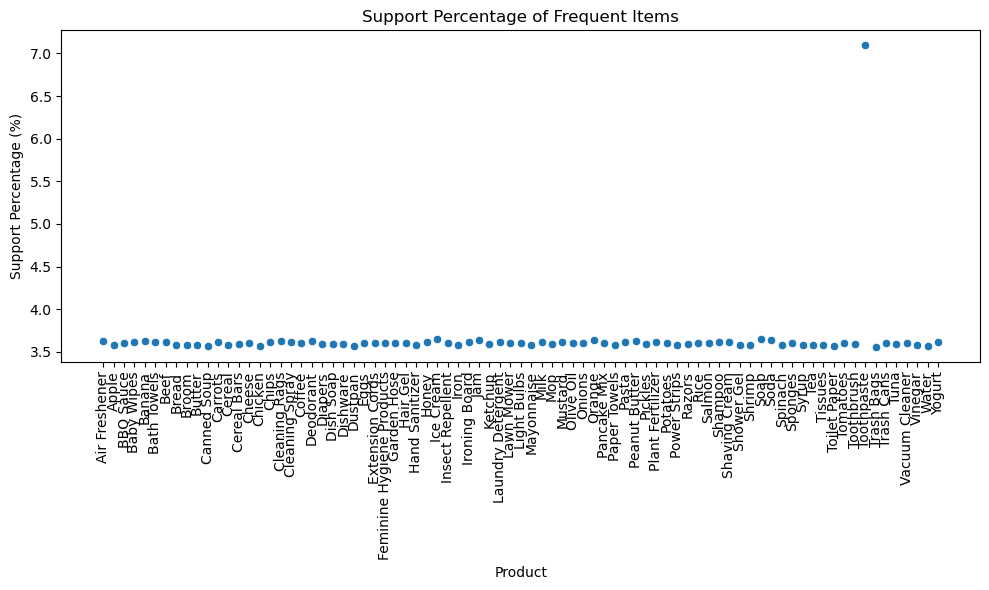

In [104]:
# scatter plot to group items according to their support percentage
# Remove 'Transaction_ID' from frequent_items if present
product_columns = [item for item in frequent_items if item != 'Transaction_ID']

# Calculate support percentage for each frequent item
support_percent = basket_reduced[product_columns].sum() / len(basket_reduced) * 100

plt.figure(figsize=(10, 6))
sns.scatterplot(x=product_columns, y=support_percent)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Support Percentage (%)')
plt.title('Support Percentage of Frequent Items')
plt.tight_layout()
plt.show()


In [105]:
#save the model as Apriori model
frequent_itemsets.to_csv(r'C:\Users\Rebecca\Desktop\market basket analysis project\frequent_itemsets.csv', index=False)